## Pré processamento: Transformações Geometricas
***
### Operação de Rotação
***

Girar a imagem em um ângulo predeterminado

O OpenCV usa duas funções:

```py
def getRotationMatrix2D(centro, ângulo, escala):
    centro = Centro da imagem (total de colunas / 2 e total de linhas / 2)
    ângulo = Ângulo que deseja rotacionar a imagem
    escala = Fator de escala (default = 1 ou seja mesma dimensão)
    
    return Matriz de rotação
    
def warpAffine(src, matriz, dsize):
    src = Matriz referente a imagem original
    matriz = Matriz de rotação
    dsize = Tamanho da imagem rotacionada
    
    return Imagem rotacionada
```

***

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img_original = cv.imread("./Imagens/einstein.jpg")
print(img_original.size)

714450


In [3]:
# Se a imagem for de tons de cinza vai retornar somente o total de linhas e colunas
total_linhas, total_colunas, total_canais = img_original.shape

In [4]:
# Pega a matriz de rotação 45 graus
centro = (total_colunas/2, total_linhas/2)
matriz = cv.getRotationMatrix2D(centro, 45, 1)

In [5]:
# Pega a imagem rotacionada
tamanho_da_imagem = (total_colunas, total_linhas)
img_rotacionada = cv.warpAffine(img_original, matriz, tamanho_da_imagem)

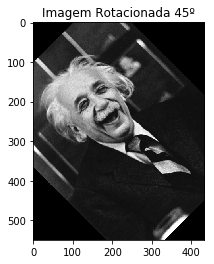

In [6]:
# Mostrar a imagem
plt.imshow(img_rotacionada)
plt.title("Imagem Rotacionada 45º")
plt.show()

***
### Operação de Translação
***

Deslocar a imagem em relação a sua posição inicial

Função float32 da biblioteca numpy.

Por exemplo, se no primeiro vetor for selecionado [1, 0, 100] é pq a parte horizontal sofrerá a translação de 100px. Já se o vetor for [0, 1, 100] a parte vertical que sofrerá a translação.

```py
def float32([[h, v, px], [h, v, px]]):
    [h, v, px] = Horizonal, Vertical, quantidade de pixels referente ao deslocamento
    
    return Matriz da imagem deslocada
```

In [7]:
matriz = np.float32([[1, 0, 100], [0, 1, 100]])

In [8]:
img_deslocada = cv.warpAffine(img_original, matriz, tamanho_da_imagem)

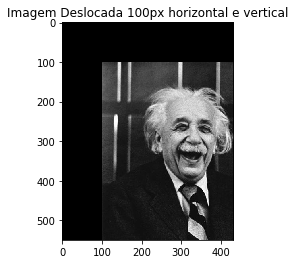

In [9]:
# Mostrar a imagem
plt.imshow(img_deslocada)
plt.title("Imagem Deslocada 100px horizontal e vertical")
plt.show()

***
### Operação de Ajuste de Escala
***

É possível fazer um ajuste de escala de uma imagem sem distorce-la.

Função resize()

```py
def resize(src, dst, fx, fy, interpolation):
    src = Matriz referente à imagem
    dst = Imagem de saída
    fx = Fator de escala horizontal
    fy = Fator de escala vertical
    interpolation = Método de interpolação
    
    return Imagem modificada
```

Os fatores são valores númericos positivos e define o qual ampliado ou reduzido será a imagem, mantendo o parâmetro em 1.0 não haverá ajuste de escala, 2.0 tem o dobro de altura ou largura e 0.5 tem a métade do mesmo.

Existem vários métodos de interpolação no OpenCV a mais usada é a interpolação cúbica.

In [10]:
# Vamos reduzir a imagem pela metade
img_modificada = cv.resize(img_original, None, fx=0.5, fy=0.5, interpolation=cv.INTER_CUBIC)

In [11]:
# Mostrar a imagem
print(img_original.shape[:2])
print(img_modificada.shape[:2])

(550, 433)
(275, 216)
